<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW5 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due March 3, 2025 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Meg Bucich

## Your ID: 131787276

## 1. Summary

(1) We were utilizing our knowlegde of matplotlib to try to recreate a graph that we were provided. We were given the basic code to simply plot the function and we had to add in all the other features on our own including label, legend, fill, and annotate.(2) We were provided a code for a function called "softmax" and were told to analyze the block of code to understand the function, then recreate the output vectors using a forloop given the input vectors.(3) We were asked to solve 2 different ODE to show the given equation was a solution to both. We then made graphs of solutions with 4 different values for sigma.

## 2. Methodology

(1) To add in the fill, I used the plt.fill_between command to mimic how the sample graph. To bet the legend in the top right, added a label command in my plot function, then added a legend. You need to have a label for something to show up when you use the legend command. To get a line that connects the local min and local max values, we first need the derivative of the function. This will allow us to get critical points. To get the arrows, Audrey walked us through how to use the annotate function and all the components we can add to get the correct details.(2)To recreate the softmax function with a for loop, I first needed to know what the code was doing. Once I figured that out, I got the components then iterated over the input array to get the rest of the components. It requires a summation of each vector input in a exponential. I made sure to run the original code to make sure my results were accurate.(3)To solve the first ODE, I used seperation of variables method. For the second ODE, I used the method of undetermined coefficents. Then to plot the solutions in  4 panel plot, i used the subplot command and r strings to get the titles to have mathematical symbols. 

## 3. Code and Results (e.g., Tables, Figures, Outputs)

## Results for Question 1A

### Sample 1: Simple Plot

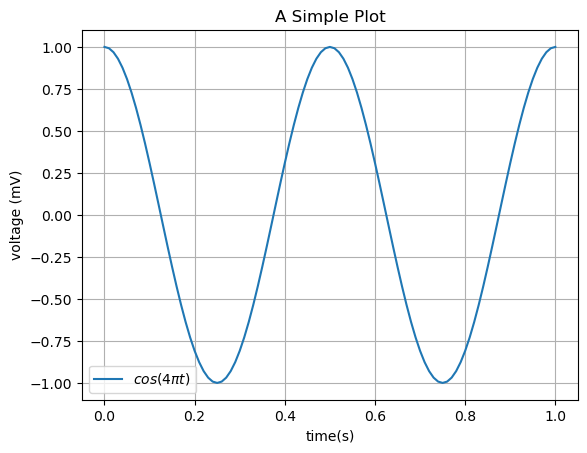

In [211]:
dt = 0.01
t = np.arange(0,1+dt,dt) #1+dt insures 1 is included
s = np.cos(2*2*np.pi*t)
plt.plot(t,s,label = r'$cos(4\pi t)$')
plt.xlabel('time(s)') 
plt.ylabel('voltage (mV)')
plt.title('A Simple Plot')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### Sample 2: Horizontal and Verticle Lines

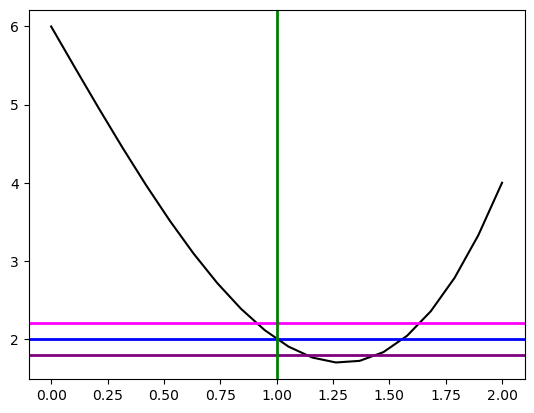

In [117]:
x = np.linspace(0.,2.,20)
y = x**3 - 5*x + 6
L= 2.0
eps = 0.2
plt.plot(x,y,'-k') #-k is a black line, --k would be a dotted black line, .k would be unconnected black dots 
#making horizontal lines
plt.axhline(y = L + eps, xmin=x[0],xmax=x[-1], linewidth = 2, color = 'magenta')
plt.axhline(y = L - eps, xmin=x[0],xmax = x[-1], linewidth = 2, color = 'purple')
plt.axhline(y = L, xmin=x[0],xmax = x[-1], linewidth = 2, color = 'blue')
#making verticle lines
plt.axvline(x = 1, linewidth = 2, color = 'g')
plt.show()

### Sample 3: Subplots

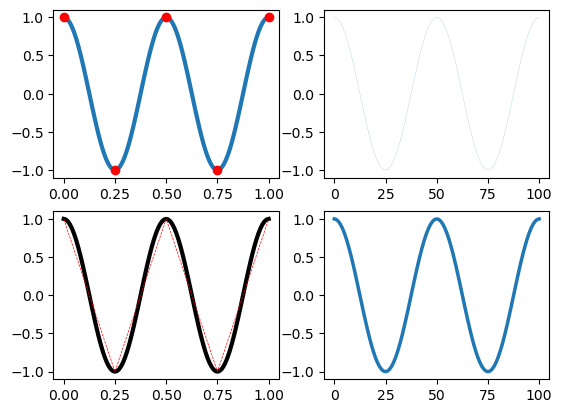

In [138]:
def f(t):
    return np.cos(4*np.pi*t)
dt = 0.01
t1 = np.arange(0,1+dt,dt)
s1 = f(t1)

dt2 = 0.25
t2 = np.arange(0,1+dt2,dt2)
s2 = f(t2)

#first figure
plt.subplot(2,2,1) #set up 2 rows, 2 columns, indicate which figure we're making
plt.plot(t1,s1,linewidth = 3)
plt.plot(t2,s2, 'ro')

#second figure
plt.subplot(2,2,2)
plt.plot(s1,linewidth = 0.1) #can jusrt give it a y-value but usually do x and y
#line will be really small and faint

#third figure
plt.subplot(2,2,3)
plt.plot(t1,s1,'k',linewidth = 3)
plt.plot(t2,s2,'r--',linewidth = 0.5)

#fourth figure
plt.subplot(2,2,4)
plt.plot(s1,linewidth = 2.5)
plt.show()

### Sample 4: Pie Chart

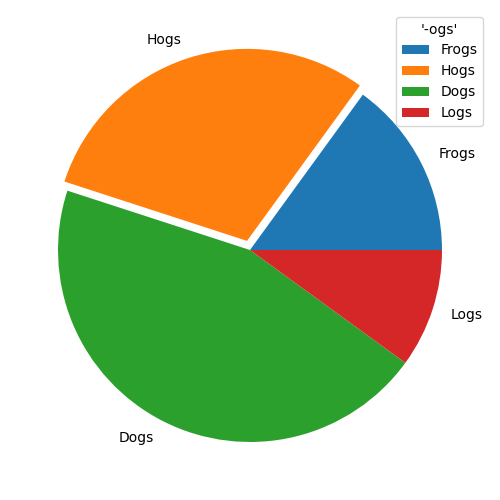

In [157]:
plt.figure(1,figsize = (6,6))
ax = plt.axes([0.1,0.1,0.8,0.8])
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
fracts = [15,30,45,10] #percent for each label
explode = (0,0.05,0,0) #giving a value to a category for "exploding" (highlight) , taking the piece out slightly, small numbers are good
plt.pie(fracts, explode = explode, labels = labels)
plt.legend(title = "'-ogs'")
plt.show()

### Sample 5: Histogram

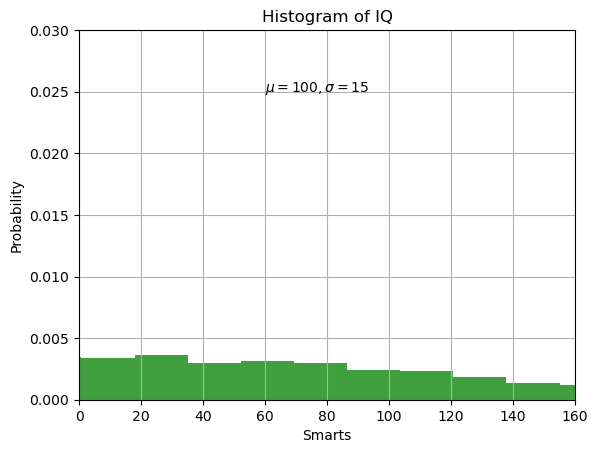

In [169]:
mu, sigma = 100, 15
x = (mu + sigma) * np.random.randn(10000) #random distribution of 10,000 values
n, bins, patches = plt.hist(x,50,density = True, facecolor = 'g',alpha = 0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60,0.025,r'$\mu = 100, \sigma = 15$')
plt.axis([40,160,0,0.03])
plt.grid()
plt.show()

### Results for Question 1B

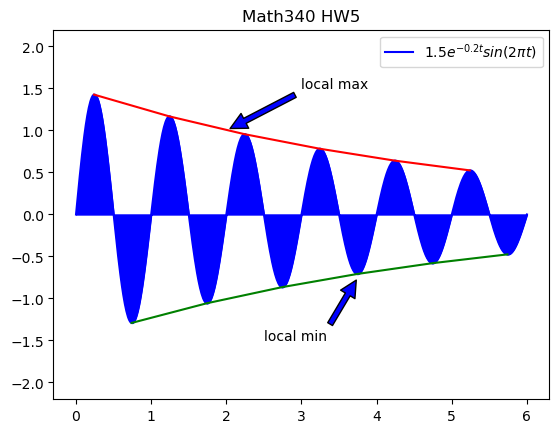

In [171]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
t = np.arange(0.0,6.0+dt,dt)
s = 1.5*np.exp(-0.2*t)*np.sin(2*np.pi*t)

#calculating the derivative
ds_dt = np.gradient(s, dt)
#finding critical points by finding when ds_dt is equal to 0
critical_points = np.where(np.diff(np.sign(ds_dt)))[0]
t_crit,s_crit = t[critical_points], s[critical_points]
maxima, minima = t_crit[s_crit > 0], t_crit[s_crit < 0]
s_max, s_min = s[critical_points][s_crit > 0] ,s[critical_points][s_crit < 0]

#get the lines on the graph
plt.plot(t,s, color = "blue", label = r'$1.5e^{-0.2t}sin(2\pi t)$')
plt.plot(maxima, s_max, color = 'red')
plt.plot(minima, s_min, color = 'green')

#add the components 
plt.fill_between(t, s, color="blue")
plt.ylim(-2.2,2.2)
plt.title("Math340 HW5")
plt.legend(loc='best')
plt.annotate('local max', xy = (2,1), xytext = (3,1.5), arrowprops = dict(facecolor = 'b', shrink = 0.05))
plt.annotate('local min', xy = (3.75,-.75), xytext =(2.5,-1.5) , arrowprops = dict(facecolor = 'b', shrink = 0.05))
plt.show()




### Results for Question 2

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum\limits_{j=1}^{n} e^{x_j}}
$$



### Original Softmax Code

In [53]:
import numpy as np
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum()

input_vector = np.array([10,2.0,0.1])
output_vector = softmax(input_vector)
print(input_vector)
print(output_vector)
print(output_vector.sum())

[10.   2.   0.1]
[9.99614511e-01 3.35333311e-04 5.01553403e-05]
0.9999999999999999


### My Softmax Code

In [57]:
input_vector = np.array([10,2.0,0.1])
denominator = np.sum(np.exp(input_vector))
output_vector = np.array([])
for i in range(len(input_vector)):
    output = np.exp(input_vector[i]) / denominator
    output_vector = np.append(output_vector, output)
print(input_vector)
print(output_vector)
print(output_vector.sum())

[10.   2.   0.1]
[9.99614511e-01 3.35333311e-04 5.01553403e-05]
0.9999999999999999


### Results for Question 3A

$\frac{dy}{dt} = \sigma y $
\
$\frac{1}{y} dy = \sigma dt$
\
$\int \frac{1}{y} \, dy = \int \sigma \, dt$
\
$ln| y | = \sigma t$
\
$e^{ln| y |} = e^{\sigma t}$
\
$ y = e^{\sigma t}$ 
\
$\text{Therefore, } y = e^{\sigma t } \text{ is a solution to the ODE } \frac{dy}{dt} = \sigma y $

### Results for Question 3B

$\frac{d^{2}y}{dt^{2}} = \sigma^{2} y $ \
$\text{solve the characteristic equation: } m^{2} - \sigma^{2} = 0 $\
$ m \pm \sigma $\
$\text{Complimentary solution: } y = C_{1}e^{\sigma t} + C_{2}e^{-\sigma t}$\
$\text{Therefore, } y = e^{\sigma t } \text{ is a solution to the ODE } \frac{d^{2}y}{dt^{2}} - \sigma^{2} y = 0 $

### Results for Question 3C

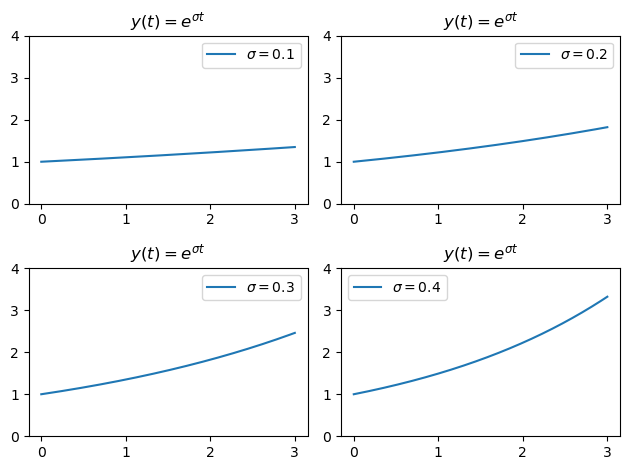

In [79]:

plt.figure(1)
t = np.linspace(0,3,1000)

sigma1 = 0.1
y1 = np.exp(sigma1*t)
plt.subplot(2,2,1)
plt.plot(t,y1, label = r"$\sigma = 0.1$")
plt.ylim(0,4)
plt.title(r"$y(t)=e^{\sigma t}$")
plt.legend()

sigma2 = 0.2
y2 = np.exp(sigma2*t)
plt.subplot(2,2,2)
plt.plot(t,y2, label = r"$\sigma = 0.2$")
plt.ylim(0,4)
plt.legend()
plt.title(r"$y(t)=e^{\sigma t}$")

sigma3 = 0.3
y3 = np.exp(sigma3*t)
plt.subplot(2,2,3)
plt.plot(t,y3, label = r"$\sigma = 0.3$")
plt.ylim(0,4)
plt.legend()
plt.title(r"$y(t)=e^{\sigma t}$")

sigma4 = 0.4
y4 = np.exp(sigma4*t)
plt.subplot(2,2,4)
plt.plot(t,y4, label = r"$\sigma = 0.4$")
plt.ylim(0,4)
plt.legend()
plt.title(r"$y(t)=e^{\sigma t}$")


plt.tight_layout()
plt.show()
